# Loading train data

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')
data['Target'] = data['Target'].map({"high" :2, "medium" :1, "low" : 0})
data.shape

(112569, 58)

In [ ]:
Y_train = data['Target']
data.drop(['Target'], axis=1, inplace = True)
X_train = data.loc[:,:]

# Class Distribution

Class Distribution in Y_train:
Target
1    67541
2    22514
0    22514
Name: count, dtype: int64


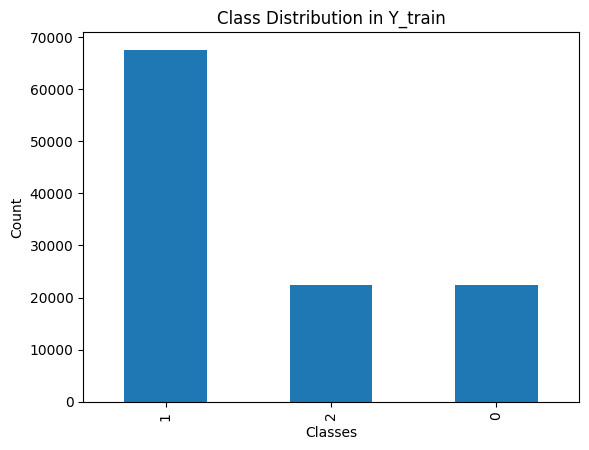

In [ ]:
class_distribution = Y_train.value_counts()
print("Class Distribution in Y_train:")
print(class_distribution)
# import matplotlib.pyplot as plt
# class_distribution.plot(kind='bar')
# plt.title("Class Distribution in Y_train")
# plt.xlabel("Classes")
# plt.ylabel("Count")
# plt.show()

# Preprocess train data

In [ ]:
nullval = X_train.isnull().sum()
nullval_perc = 100*nullval / len(X_train)
nullval_perc.sort_values()

,0
UID,0.000000
AgriculturalPostalZone,0.000000
NationalRegionCode,0.017767
Longitude,0.017767
Latitude,0.017767
LandUsageType,0.017767
StorageAndFacilityCount,0.017767
RawLocationId,0.017767
WaterAccessPoints,0.017767
CropSpeciesVariety,0.017767


### Correlation matrix

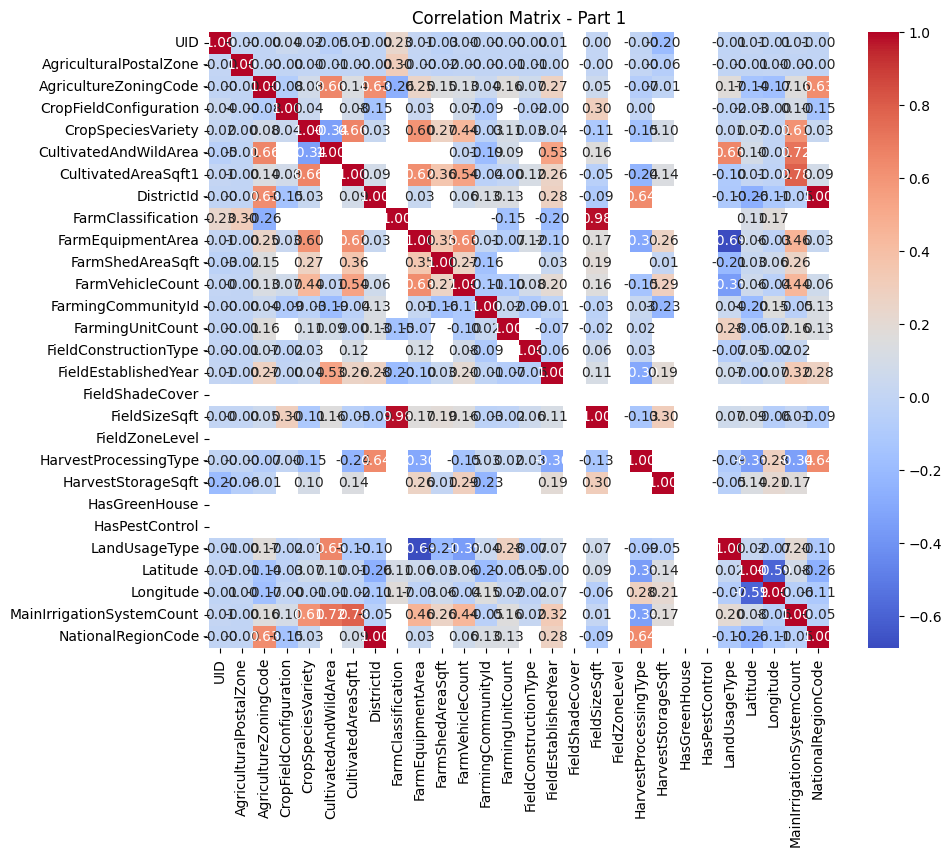

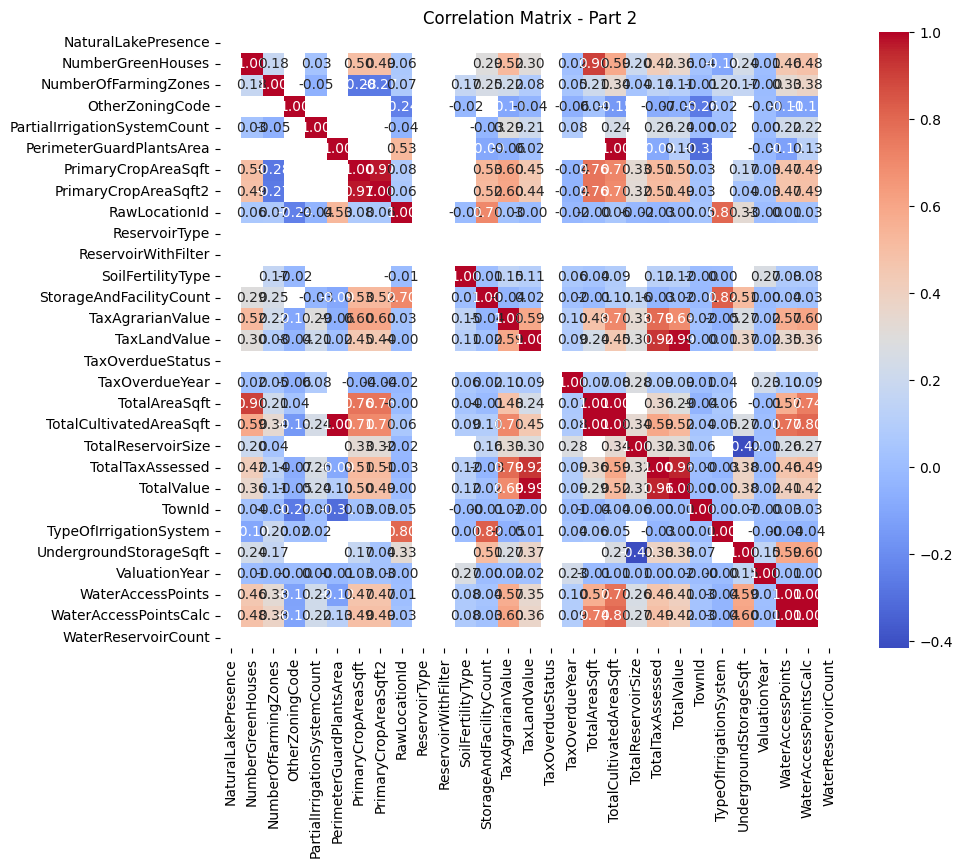

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

print(correlation_matrix)

# correlation_part1 = correlation_matrix.iloc[:len(correlation_matrix)//2, :len(correlation_matrix)//2]
# correlation_part2 = correlation_matrix.iloc[len(correlation_matrix)//2:, len(correlation_matrix)//2:]

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_part1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix - Part 1")
# plt.show()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_part2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix - Part 2")
# plt.show()

In [ ]:
train_with_target = pd.concat([X_train, Y_train], axis=1)
correlation_with_target = train_with_target.corr()[Y_train.name].sort_values(ascending=False)

In [ ]:
X_train.drop(correlation_with_target[abs(correlation_with_target) < 0.01].keys(), axis = 1, inplace = True)

### Dropping insignificant columns

In [ ]:
X_train.drop(['FarmClassification','PerimeterGuardPlantsArea','FieldZoneLevel','UndergroundStorageSqft',
              'HasGreenHouse','FieldShadeCover','FarmShedAreaSqft','TotalAreaSqft',
              'UID','HarvestStorageSqft','ReservoirType','FieldConstructionType','CultivatedAndWildArea',
              'CropFieldConfiguration','TotalReservoirSize','ReservoirWithFilter',
              'HasPestControl','TaxOverdueStatus','TaxOverdueYear'], axis =1 , inplace = True)

In [ ]:
X_train.drop(['WaterAccessPointsCalc'], axis =1 , inplace = True)

### Binary indicators

In [ ]:
X_train['HasGreenHouse'] = X_train['NumberGreenHouses'].apply(lambda x: 1 if x > 0 else 0)
X_train['HasPartialIrrigationSystemCount'] = X_train['PartialIrrigationSystemCount'].apply(lambda x: 1 if x > 0 else 0)
X_train['HasWaterReservoirCount'] = X_train['WaterReservoirCount'].apply(lambda x: 1 if x > 0 else 0)
X_train['HasNaturalLakePresence'] = X_train['NaturalLakePresence'].apply(lambda x: 1 if x > 0 else 0)
print(X_train['HasGreenHouse'].value_counts())
print(X_train['HasPartialIrrigationSystemCount'].value_counts())
print(X_train['HasWaterReservoirCount'].value_counts())
print(X_train['HasNaturalLakePresence'].value_counts())

HasGreenHouse
0    100472
1     12097
Name: count, dtype: int64
HasPartialIrrigationSystemCount
0    97520
1    15049
Name: count, dtype: int64
HasWaterReservoirCount
0    89405
1    23164
Name: count, dtype: int64
HasNaturalLakePresence
0    90955
1    21614
Name: count, dtype: int64


### Filling NULL with domain specific values

In [ ]:
X_train.drop(['NumberGreenHouses','PartialIrrigationSystemCount','NaturalLakePresence','WaterReservoirCount'], axis =1, inplace = True)
X_train['NumberOfFarmingZones'] = X_train['NumberOfFarmingZones'].fillna(value = 1).astype(int)

In [ ]:
X_train['TypeOfIrrigationSystem'] = X_train['TypeOfIrrigationSystem'].fillna(value = 0)
X_train['TypeOfIrrigationSystem'] = X_train['TypeOfIrrigationSystem'].astype(int)
X_train['TypeOfIrrigationSystem'] = X_train['TypeOfIrrigationSystem'].astype(str)
X_train['TypeOfIrrigationSystem'].value_counts()

,count
TypeOfIrrigationSystem,
0,76133
1,33744
3,2346
2,249
4,80
5,16
6,1


In [ ]:
X_train['FarmEquipmentArea'].value_counts()
X_train['FarmVehicleCount'].value_counts()

,count
FarmVehicleCount,
2.0,27447
1.0,8228
3.0,872
0.0,359
4.0,331
5.0,57
6.0,18
7.0,11
9.0,7


### Filling NULL with median or mode

In [ ]:
farmequipmentarea_median = X_train['FarmEquipmentArea'].median()
farmvehiclecount_median = X_train['FarmVehicleCount'].median()
X_train['FarmEquipmentArea'] = X_train['FarmEquipmentArea'].fillna(farmequipmentarea_median).astype(int)
X_train['FarmVehicleCount'] = X_train['FarmVehicleCount'].fillna(farmvehiclecount_median).astype(int)

In [ ]:
nullval = X_train.isnull().sum()
nullval_perc = 100*nullval / len(X_train)
nullval_perc.sort_values()

,0
HasNaturalLakePresence,0.000000
HasPartialIrrigationSystemCount,0.000000
HasGreenHouse,0.000000
FarmEquipmentArea,0.000000
FarmVehicleCount,0.000000
TypeOfIrrigationSystem,0.000000
HasWaterReservoirCount,0.000000
NumberOfFarmingZones,0.000000
WaterAccessPoints,0.017767
ValuationYear,0.017767


In [ ]:
imputation_values = {
    'TaxLandValue': X_train['TaxLandValue'].median(),
    'TotalTaxAssessed': X_train['TotalTaxAssessed'].median(),
    'TaxAgrarianValue': X_train['TaxAgrarianValue'].median(),
    'TotalValue': X_train['TotalValue'].median(),
    'TotalCultivatedAreaSqft': X_train['TotalCultivatedAreaSqft'].median(),
    'FieldEstablishedYear': X_train['FieldEstablishedYear'].median(),
    'MainIrrigationSystemCount': X_train['MainIrrigationSystemCount'].median(),
    'TownId': X_train['TownId'].mode()[0],
    'CultivatedAreaSqft1': X_train['CultivatedAreaSqft1'].median(),
    'HarvestProcessingType': X_train['HarvestProcessingType'].mode()[0],
    'CropSpeciesVariety': X_train['CropSpeciesVariety'].median(),
    'WaterAccessPoints': X_train['WaterAccessPoints'].median(),
    'ValuationYear': X_train['ValuationYear'].mode()[0],
    'RawLocationId': X_train['RawLocationId'].mode()[0],
    'DistrictId': X_train['DistrictId'].mode()[0],
    'StorageAndFacilityCount': X_train['StorageAndFacilityCount'].median(),
    'Longitude': X_train['Longitude'].median(),
    'Latitude': X_train['Latitude'].median(),
    'NationalRegionCode': X_train['NationalRegionCode'].mode()[0]
}
for column, value in imputation_values.items():
    X_train[column] = X_train[column].fillna(value).astype(int)

In [ ]:
X_train.shape

(112569, 27)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112569 entries, 0 to 112568
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   CropSpeciesVariety               112569 non-null  int64 
 1   CultivatedAreaSqft1              112569 non-null  int64 
 2   DistrictId                       112569 non-null  int64 
 3   FarmEquipmentArea                112569 non-null  int64 
 4   FarmVehicleCount                 112569 non-null  int64 
 5   FieldEstablishedYear             112569 non-null  int64 
 6   HarvestProcessingType            112569 non-null  int64 
 7   Latitude                         112569 non-null  int64 
 8   Longitude                        112569 non-null  int64 
 9   MainIrrigationSystemCount        112569 non-null  int64 
 10  NationalRegionCode               112569 non-null  int64 
 11  NumberOfFarmingZones             112569 non-null  int64 
 12  RawLocationId   

### Frequency encoders

In [ ]:
freq_encoders = {}

In [ ]:
freq_encoding = X_train['RawLocationId'].value_counts().to_dict()
X_train['RawLocationId'] = X_train['RawLocationId'].map(freq_encoding)
freq_encoders['RawLocationId'] = freq_encoding

In [ ]:
freq_encoding = X_train['TownId'].value_counts().to_dict()
X_train['TownId'] = X_train['TownId'].map(freq_encoding)
freq_encoders['TownId'] = freq_encoding

In [ ]:
# fixing year values
current_year = 2024
X_train['FieldAge'] = current_year - X_train['FieldEstablishedYear']
X_train = X_train.drop(['FieldEstablishedYear'], axis = 1)

### Categorical data- label encoding and one hot encoding

In [ ]:
categorical_type = [ 'DistrictId', 'HarvestProcessingType',  'NationalRegionCode',  'TypeOfIrrigationSystem']

In [ ]:
X_train[categorical_type] = X_train[categorical_type].astype(str)

In [ ]:
from sklearn import preprocessing
count = 0

label_encorders = {}

for col in X_train:
    if X_train[col].dtype == 'object':
        if len(list(X_train[col].unique())) <= 2:
            le = preprocessing.LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            count += 1
            label_encorders[col] = le
            print (col)

In [ ]:
temp = X_train[categorical_type]
temp = pd.get_dummies(temp)
train_temp = temp
print(temp.shape)

(112569, 25)


In [ ]:
X_train = X_train.drop(categorical_type, axis=1)
X_train = pd.concat([X_train, temp], axis = 1)

In [ ]:
X_train.shape

(112569, 48)

### Upsampling- Data Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train, Y_train = oversampler.fit_resample(X_train, Y_train)

### Dimensionality reduction- PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 40)
X_train = pca.fit_transform(X_train)

# Preprocess test data

In [ ]:
def fill_na_values(X_test):
  X_test.drop(correlation_with_target[abs(correlation_with_target) < 0.01].keys(), axis = 1, inplace = True)
  X_test.drop(['FarmClassification','PerimeterGuardPlantsArea','FieldZoneLevel','UndergroundStorageSqft',
              'HasGreenHouse','FieldShadeCover','FarmShedAreaSqft','TotalAreaSqft',
              'UID','HarvestStorageSqft','ReservoirType','FieldConstructionType','CultivatedAndWildArea',
              'CropFieldConfiguration','TotalReservoirSize','ReservoirWithFilter',
              'HasPestControl','TaxOverdueStatus','TaxOverdueYear'], axis =1 , inplace = True)
  X_test.drop(['WaterAccessPointsCalc'], axis =1 , inplace = True)
  X_test['HasGreenHouse'] = X_test['NumberGreenHouses'].apply(lambda x: 1 if x > 0 else 0)
  X_test['HasPartialIrrigationSystemCount'] = X_test['PartialIrrigationSystemCount'].apply(lambda x: 1 if x > 0 else 0)
  X_test['HasWaterReservoirCount'] = X_test['WaterReservoirCount'].apply(lambda x: 1 if x > 0 else 0)
  X_test['HasNaturalLakePresence'] = X_test['NaturalLakePresence'].apply(lambda x: 1 if x > 0 else 0)
  X_test.drop(['NumberGreenHouses','PartialIrrigationSystemCount','NaturalLakePresence','WaterReservoirCount'], axis =1, inplace = True)
  X_test['NumberOfFarmingZones'] = X_test['NumberOfFarmingZones'].fillna(value = 1).astype(int)
  X_test['TypeOfIrrigationSystem'] = X_test['TypeOfIrrigationSystem'].fillna(value = 0)
  X_test['TypeOfIrrigationSystem'] = X_test['TypeOfIrrigationSystem'].astype(int)
  X_test['TypeOfIrrigationSystem'] = X_test['TypeOfIrrigationSystem'].astype(str)
  X_test['FarmEquipmentArea'] = X_test['FarmEquipmentArea'].fillna(farmequipmentarea_median).astype(int)
  X_test['FarmVehicleCount'] = X_test['FarmVehicleCount'].fillna(farmvehiclecount_median).astype(int)
  return X_test

In [ ]:
def encoding(X_test):
  for column, value in imputation_values.items():
    X_test[column] = X_test[column].fillna(value).astype(int)
  for col, encoder in freq_encoders.items():
    X_test[col] = X_test[col].map(encoder)
    X_test[col] = X_test[col].fillna(0)
  X_test['FieldAge'] = current_year - X_test['FieldEstablishedYear']
  X_test = X_test.drop(['FieldEstablishedYear'], axis = 1)
  X_test[categorical_type] = X_test[categorical_type].astype(str)
  for col, encoder in label_encorders.items():
    X_test[col] = encoder.transform(X_test[col])
  temp = X_test[categorical_type]
  temp = pd.get_dummies(temp)
  temp = temp.reindex(columns=train_temp.columns, fill_value=0)
  X_test = X_test.drop(categorical_type, axis=1)
  X_test = pd.concat([X_test, temp], axis = 1)
  return X_test

# Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def train_model(X_train, Y_train):
  print("Training Started")
  model = RandomForestClassifier(n_estimators = 200, random_state =10, criterion = 'gini', max_depth = 15,
                               verbose = 2, min_samples_split = 50, min_samples_leaf = 10, n_jobs = -1)
  model.fit(X_train, Y_train)
  print("Training Completed")
  return model

# Testing

In [ ]:
def make_predictions(test_fname, predictions_fname):
  X_test = pd.read_csv(test_fname)
  test = X_test.copy()
  X_test =  fill_na_values(X_test)
  X_test = encoding(X_test)
  X_test = pca.transform(X_test)
  model = train_model(X_train, Y_train)
  y_pred = model.predict(X_test)

  result_df = pd.DataFrame({
        'UID': test['UID'],
        'Target': pd.Series(y_pred).map({2: "high", 1: "medium", 0: "low"})
  })
  result_df.to_csv(predictions_fname, index=False)
  print("Predictions saved to", predictions_fname)

In [ ]:
import argparse

if __name__=="__main__":
  parser = argparse.ArgumentParser()
  parser.add_argument("--train-file", type=str, help='file path of train.csv')
  parser.add_argument("--test-file", type=str, help='file path of test.csv')
  parser.add_argument("--predictions-file", type=str, help='save path of predictions')
  args = parser.parse_args()
  make_predictions(args.test_file, args.predictions_file)